In [6]:
import pickle
import os
from nltk import everygrams, ngrams, word_tokenize, FreqDist

#modelpath = os.path.join(os.path.dirname(os.path.dirname(__file__)), 'models/randomforest.pkl')
#vectpath = os.path.join(os.path.dirname(os.path.dirname(__file__)), 'models/tfid_vectorizer.pkl')
modelpath = os.path.dirname('../models/randomforest.pkl')
vectpath = os.path.dirname('../models/tfid_vectorizer.pkl')

In [7]:
#trained_model = pickle.load(open(modelpath, 'rb'))
#vectorizer = pickle.load(open(vectpath, 'rb'))

In [8]:
import matplotlib.pyplot as plt
import re

In [9]:
class isitkbs(object):
    
    def __init__(self, model = 'randomforest'):
        self.model = model
    #Especifica qual modelo deve ser utilizado
    #Por padrão, usa-se o randomForest
    
    #Função para determinar se uma palavra é keyboardsmashing
    #A entrada deve ser uma palavra
    def is_word_kbs(self, input_data):
        #input_data = self.input_data
        
        with open(f'../models/{self.model}.pkl', 'rb') as f:
            trained_model = pickle.load(f)
    
        with open('../models/tfid_vectorizer.pkl', 'rb') as r:
            vectorizer = pickle.load(r)
        
        if (len(input_data) == 1):
            return 0
        input_data = [input_data]
        input_ngrams = []

        for i in range(len(input_data)):
            ngram = map(''.join, list(everygrams(input_data[i], 2, 4)))
            input_ngrams.extend(ngram)

        predprob = trained_model.predict_proba(
            vectorizer.transform(input_ngrams))[:, 1]
            
        prob = sum(predprob)/len(input_ngrams)
        if (prob >= 0.5):
            return 1
        else:
            return 0
    
    #Função para determinar quais são os keyboard smashing em uma frase 
    #A entrada deve ser uma string ou uma lista de palavras    
    def is_sent_kbs(self, input_data):
        if(type(input_data) == list):
            input_data = ' '.join(input_data)
        
        mashs = []
        
        if (len(input_data) == 1):
            return mashs
        
        words = input_data.split()
        
        for word in words:
            res = self.is_word_kbs(word)
            if res == 1:
                mashs.append(word)
        
        return mashs
    
    #Função que mostra a frequência de caracteres em keyboard smashing
    #A entrada deve ser uma string ou uma lista de string
    def freqkbs(self, input_data):
        
        cont_char = {}
        if(type(input_data) == list):
            input_data = ' '.join(input_data)
        
        data = self.is_sent_kbs(input_data)
        data = ' '.join(data)
        
        if(len(data) != 0):
            data = re.sub(r'[^\w\s]','',data)
            sing_char = set(data)
            
            for i in sing_char:
                cont_char[i] = data.count(i)
            
            cont_char = dict(sorted(cont_char.items()))
            del cont_char[' ']
            
            #Determina eixo x e eixo y
            x_axis = list(cont_char.keys())
            y_axis = list(cont_char.values())
            
            #Nomeia os eixos
            plt.xlabel('Caracteres')
            plt.ylabel('Frequência')
            
            #Plota o gráfico
            plt.bar(x_axis, y_axis)
        
        return cont_char
            

In [10]:
#Inicia objeto
# teste = isitkbs(model="randomforest")
teste = isitkbs(model="naivebayes")

In [11]:
teste.is_word_kbs('ahduawfs')

1

In [16]:
teste.is_word_kbs(input(": "))

1

In [228]:
teste.is_sent_kbs('aspdo asocjn')

['aspdo', 'asocjn']

{'a': 2, 'c': 1, 'd': 1, 'j': 1, 'n': 1, 'o': 2, 'p': 1, 's': 2}

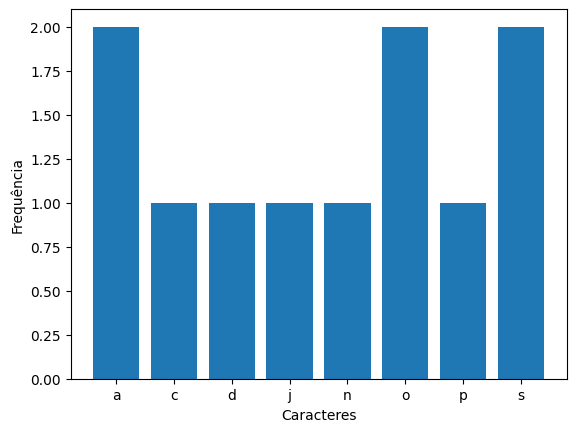

In [229]:
teste.freqkbs('aspdo asocjn')